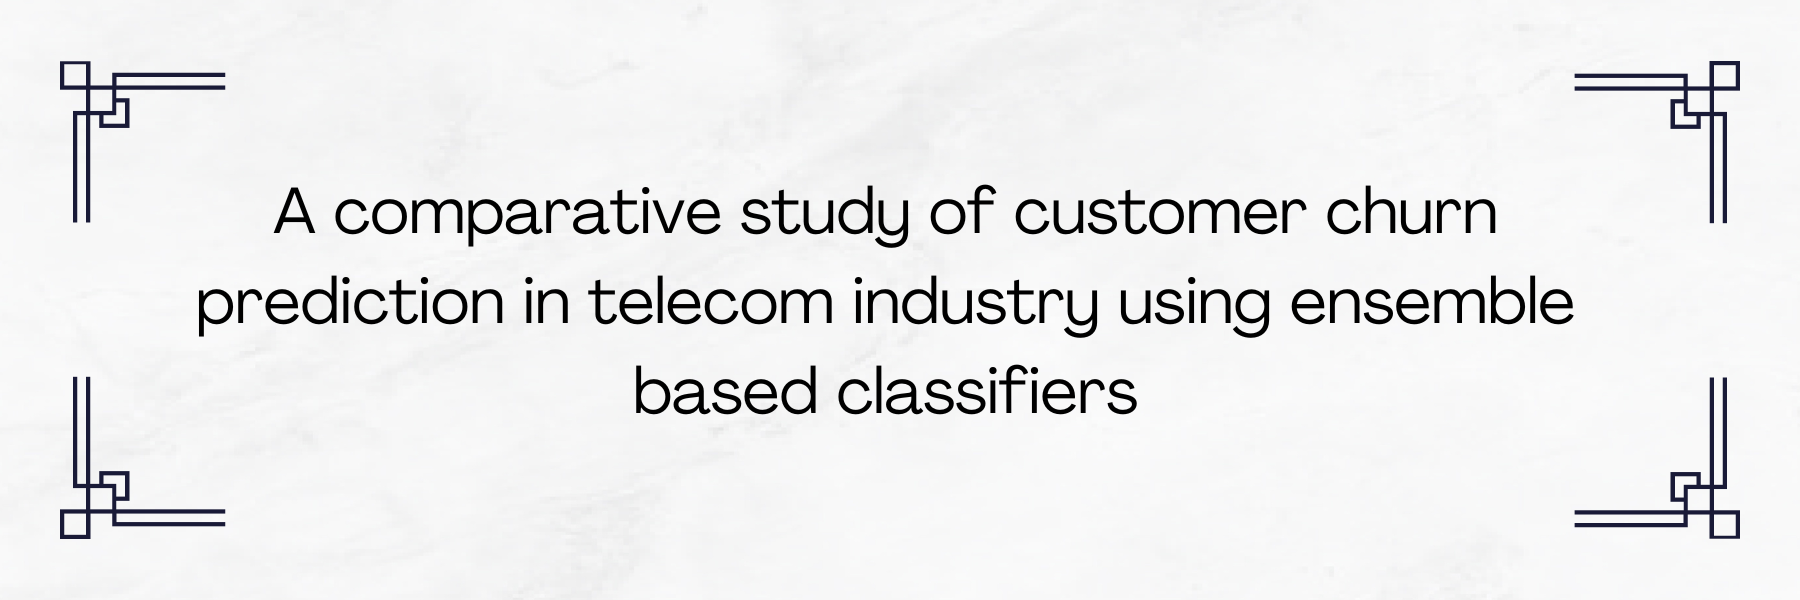

In [1]:
!pip install flask flask-ngrok


# 𝔻𝕒𝕥𝕒 𝕃𝕠𝕒𝕕𝕚𝕟𝕘 𝕒𝕟𝕕 **𝔼𝕩𝕡𝕝𝕠𝕣𝕒𝕥𝕚𝕠𝕟**

In [2]:
import numpy as np

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
!pip install xgboost


In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [7]:
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score

import warnings

In [8]:


df = pd.read_csv("C:/Users/gadha/OneDrive/Desktop/final project/WA_Fn-UseC_-Telco-Customer-Churn (2).csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 𝔻𝕒𝕥𝕒 ℂ𝕝𝕖𝕒𝕟𝕚𝕟𝕘 𝕒𝕟𝕕 **ℙ𝕣𝕖𝕡𝕣𝕠𝕔𝕖𝕤𝕤𝕚𝕟𝕘**

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df.dropna(inplace=True)
df.drop('customerID', axis=1, inplace=True)

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [14]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# **𝔼𝕩𝕡𝕝𝕠𝕣𝕒𝕥𝕠𝕣𝕪 𝔻𝕒𝕥𝕒 𝔸𝕟𝕒𝕝𝕪𝕤𝕚𝕤 (𝔼𝔻𝔸)**

<Axes: >

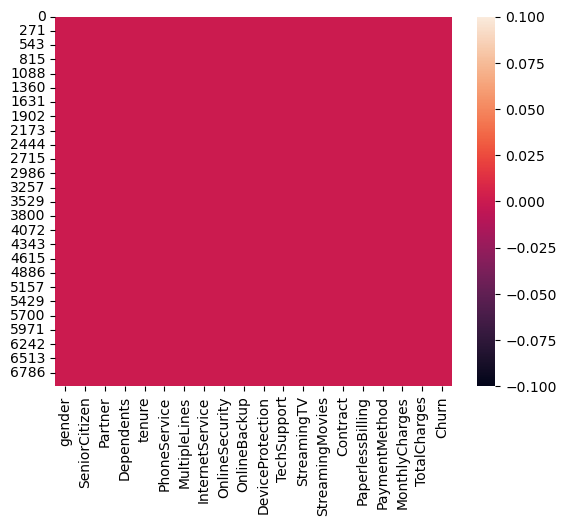

In [15]:
sns.heatmap(df.isnull())

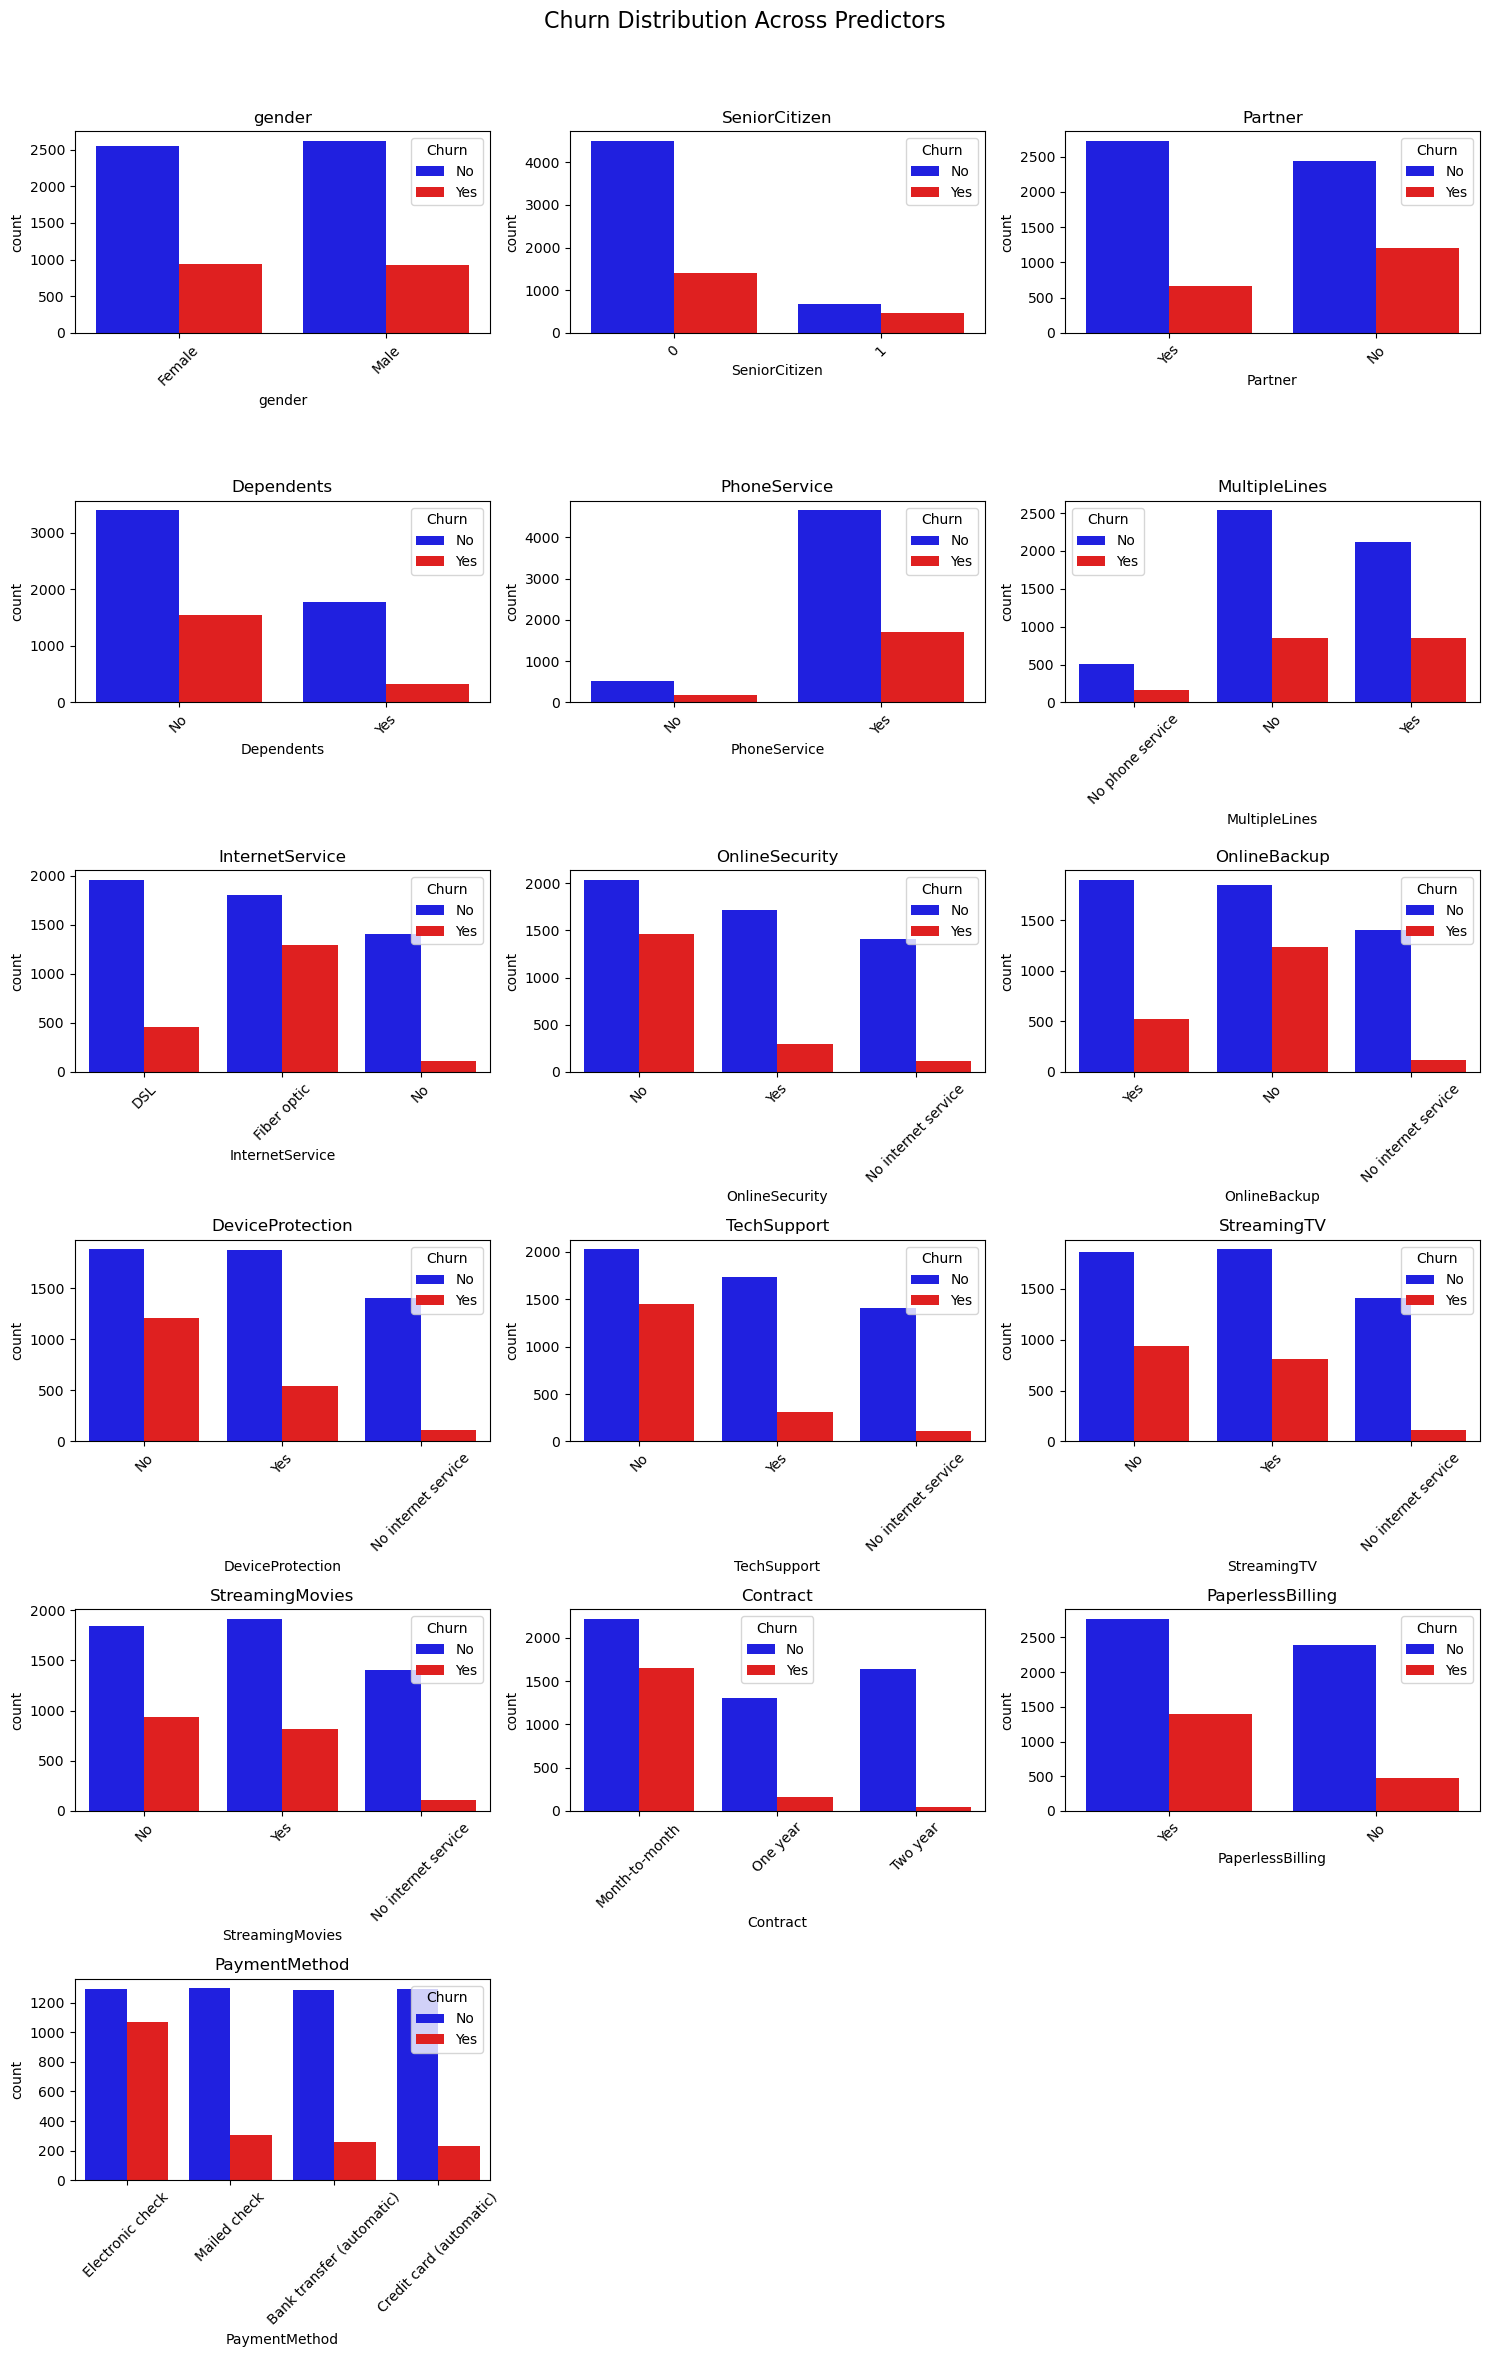

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

colors = {'Yes': 'red', 'No': 'blue'}
predictors = df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure']).columns

# Dynamically determine grid size
num_predictors = len(predictors)
num_rows = math.ceil(num_predictors / 3)  # Ensure enough rows
num_cols = min(3, num_predictors)  # Max 3 columns

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 4))
fig.suptitle("Churn Distribution Across Predictors", fontsize=16)

# Convert axes to a 1D array for easy iteration
axes = axes.flatten()

for i, predictor in enumerate(predictors):
    sns.countplot(data=df, x=predictor, hue='Churn', palette=colors, ax=axes[i])
    axes[i].set_title(predictor)
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


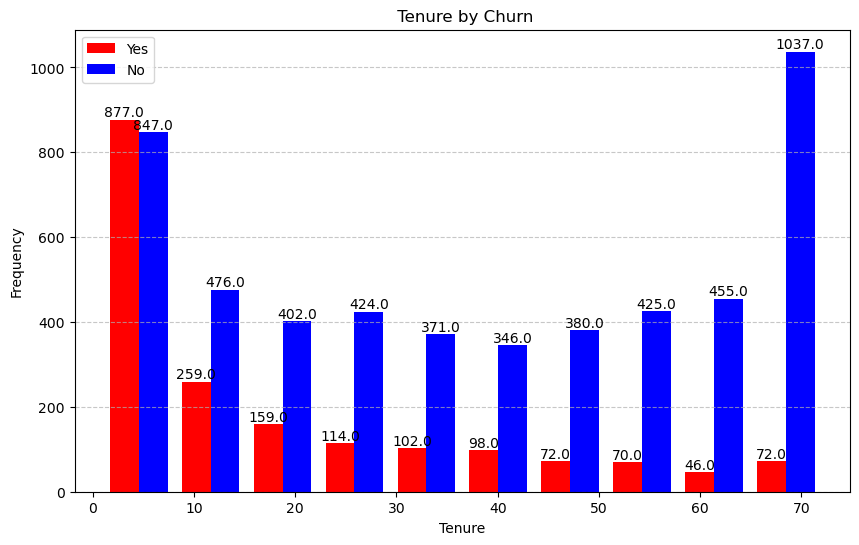

In [17]:
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['tenure'], not_churned['tenure']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

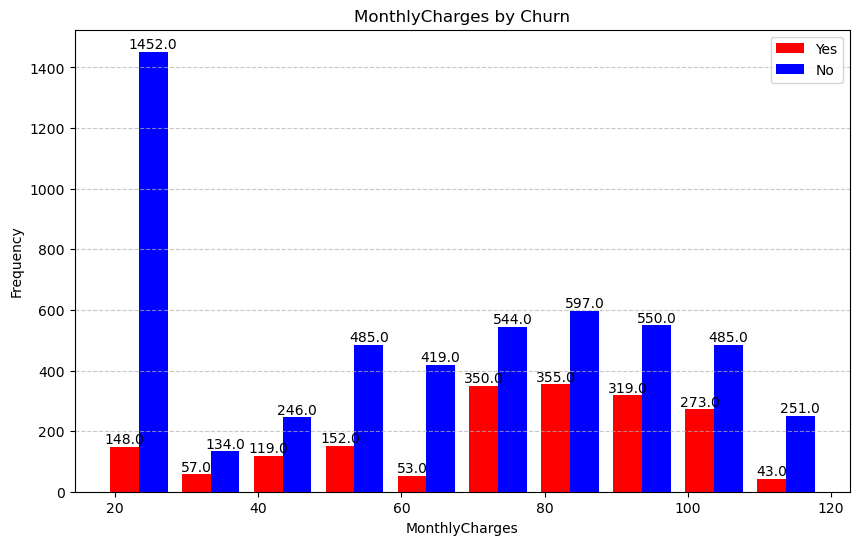

In [18]:
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['MonthlyCharges'], not_churned['MonthlyCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title('MonthlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

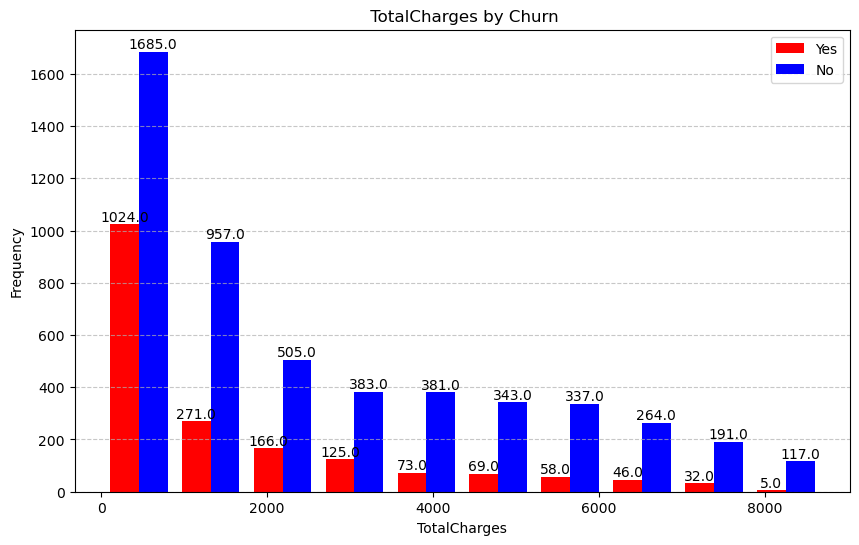

In [19]:
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['TotalCharges'], not_churned['TotalCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' TotalCharges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

C:\Users\gadha\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gadha\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


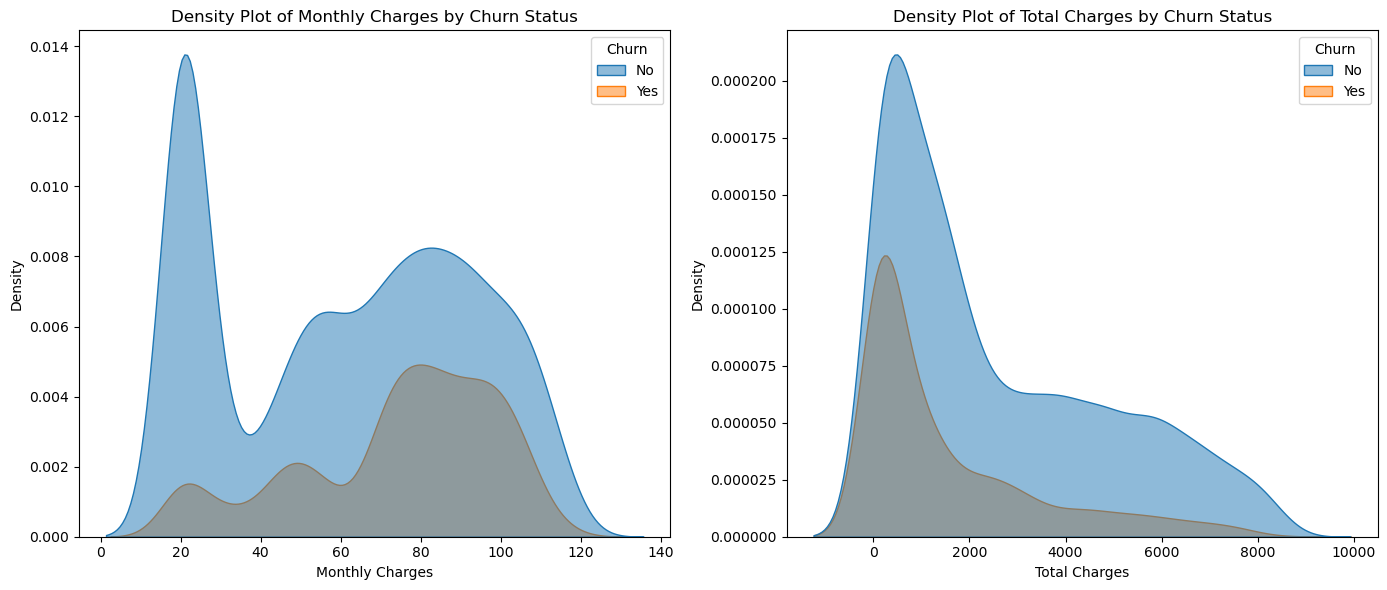

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Monthly Charges
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[0])
axes[0].set_title('Density Plot of Monthly Charges by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')

# Plot for Total Charges
sns.kdeplot(data=df, x="TotalCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[1])
axes[1].set_title('Density Plot of Total Charges by Churn Status')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

# **𝔽𝕖𝕒𝕥𝕦𝕣𝕖 𝔼𝕟𝕘𝕚𝕟𝕖𝕖𝕣𝕚𝕟𝕘**

In [21]:
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
encoded_data = encoder.fit_transform(df[categorical_cols])


In [24]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

In [25]:
df.drop(columns=categorical_cols, inplace=True)

In [26]:
df.reset_index(drop=True, inplace=True)
df = pd.concat([df, encoded_df], axis=1)

# 𝔻𝕒𝕥𝕒 𝕊𝕡𝕝𝕚𝕥𝕥𝕚𝕟𝕘 𝕒𝕟𝕕 **ℕ𝕠𝕣𝕞𝕒𝕝𝕚𝕫𝕒𝕥𝕚𝕠𝕟**

In [27]:
df.drop('Churn_No', axis=1, inplace=True)

df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [28]:
df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

In [29]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [30]:
from sklearn.preprocessing import MinMaxScaler


# **𝕄𝕠𝕕𝕖𝕝 𝕋𝕣𝕒𝕚𝕟𝕚𝕟𝕘 𝕒𝕟𝕕 𝔼𝕧𝕒𝕝𝕦𝕒𝕥𝕚𝕠𝕟**


In [31]:
# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),
    ('Naive Bayes', GaussianNB(), {})
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy * 100, 2), "%\n")

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Model Pipeline:", best_model)
print("Test Accuracy:", round(best_accuracy * 100, 2), "%")


Model: Random Forest
Test Accuracy: 79.53 %

Model: Gradient Boosting
Test Accuracy: 79.18 %

Model: Support Vector Machine
Test Accuracy: 73.06 %

Model: Logistic Regression
Test Accuracy: 72.99 %

Model: K-Nearest Neighbors
Test Accuracy: 75.34 %

Model: Decision Tree
Test Accuracy: 75.34 %

Model: Ada Boost
Test Accuracy: 78.82 %

Model: XG Boost
Test Accuracy: 79.46 %

Model: Naive Bayes
Test Accuracy: 68.37 %

Best Model:
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=10, random_state=42))])
Test Accuracy: 79.53 %


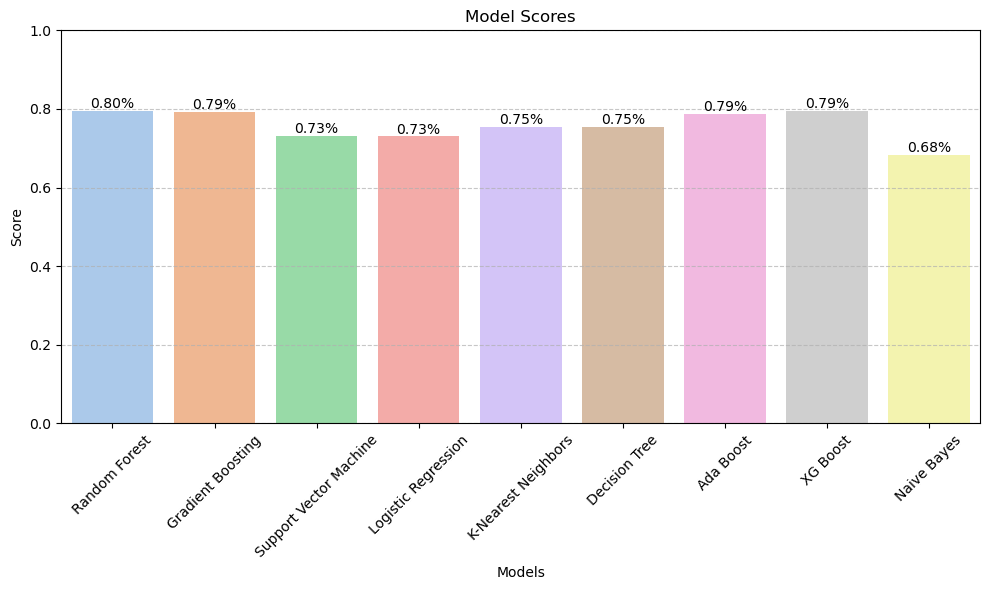

In [32]:
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **ℍ𝕒𝕟𝕕𝕝𝕚𝕟𝕘 𝕀𝕞𝕓𝕒𝕝𝕒𝕟𝕔𝕖𝕕 𝔻𝕒𝕥𝕒 (𝕊𝕄𝕆𝕋𝔼𝔼ℕℕ) & ℝ𝕖-𝕥𝕣𝕒𝕚𝕟𝕚𝕟𝕘 𝕄𝕠𝕕𝕖𝕝𝕤**

In [33]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import pandas as pd
from scipy.stats import uniform, randint

# UpSampling using SMOTEENN
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

# Splitting the resampled data
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__max_depth': randint(3, 6),
         'model__learning_rate': uniform(0.01, 0.2),
         'model__n_estimators': randint(100, 300),
         'model__subsample': uniform(0.8, 0.2)}),
    ('Naive Bayes', GaussianNB(), {})
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using RandomizedSearchCV for XG Boost
    if name == 'XG Boost':
        random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid,
                                           n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=-1)
        random_search.fit(Xr_train, yr_train)
        pipeline = random_search.best_estimator_

    # Hyperparameter tuning using GridSearchCV for other models
    elif param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2, verbose=0, n_jobs=-1)
        grid_search.fit(Xr_train, yr_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(Xr_train, yr_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(Xr_test)

    # Calculate accuracy score
    accuracy = accuracy_score(yr_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3), "%\n")

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Convert the list to a DataFrame
scores_df = pd.DataFrame(model_scores)

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", round(best_accuracy, 3), "%")
print("Model Pipeline:", best_model)


Model: Random Forest
Test Accuracy: 0.953 %

Model: Gradient Boosting
Test Accuracy: 0.963 %

Model: Support Vector Machine
Test Accuracy: 0.935 %

Model: Logistic Regression
Test Accuracy: 0.908 %

Model: K-Nearest Neighbors
Test Accuracy: 0.902 %

Model: Decision Tree
Test Accuracy: 0.939 %

Model: Ada Boost
Test Accuracy: 0.956 %

Model: XG Boost
Test Accuracy: 0.954 %

Model: Naive Bayes
Test Accuracy: 0.884 %

Best Model:
Test Accuracy: 0.963 %
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.5, n_estimators=200,
                                            random_state=42))])


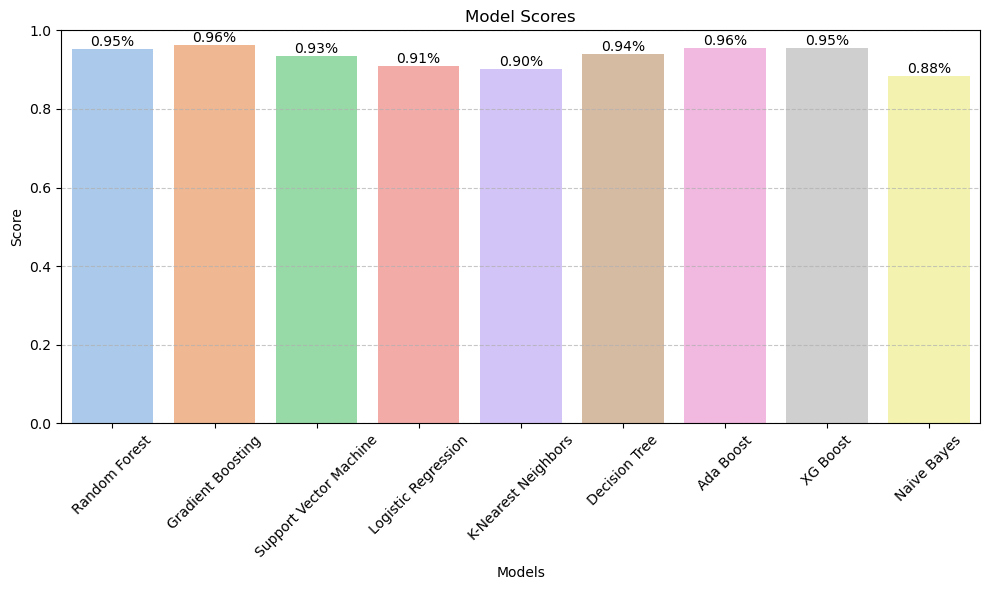

In [34]:
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

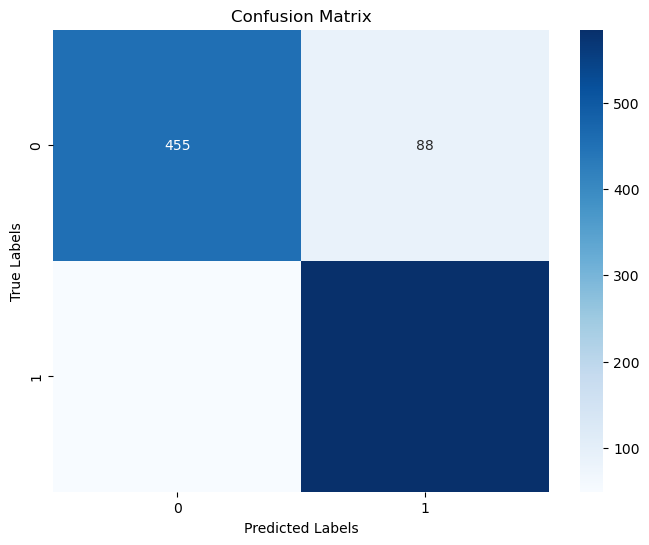

In [35]:
# Compute confusion matrix
conf_matrix = confusion_matrix(yr_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# **ℂ𝕠𝕟𝕗𝕦𝕤𝕚𝕠𝕟** **𝕄𝕒𝕥𝕣𝕚𝕩** **ℂ𝕒𝕝𝕔𝕦𝕝𝕒𝕥𝕚𝕠𝕟**


In [36]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(yr_test, y_pred)


# **ℙ𝕝𝕠𝕥𝕥𝕚𝕟𝕘 𝕥𝕙𝕖 ℂ𝕠𝕟𝕗𝕦𝕤𝕚𝕠𝕟 𝕄𝕒𝕥𝕣𝕚𝕩 𝕒𝕤 𝕒 ℍ𝕖𝕒𝕥𝕞𝕒𝕡**

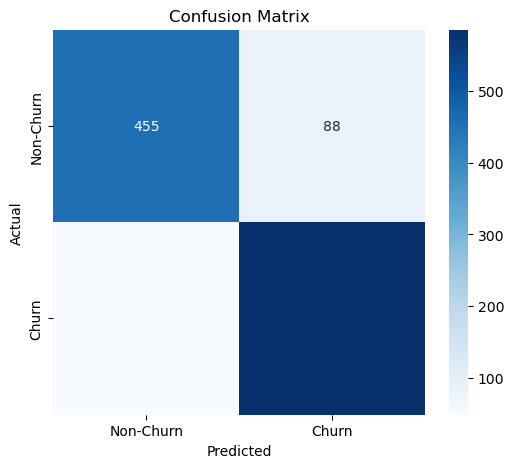

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **ℂ𝕒𝕝𝕔𝕦𝕝𝕒𝕥𝕚𝕟𝕘 ℙ𝕣𝕖𝕔𝕚𝕤𝕚𝕠𝕟, ℝ𝕖𝕔𝕒𝕝𝕝, 𝕒𝕟𝕕 𝔽𝟙-𝕊𝕔𝕠𝕣𝕖**

In [38]:
# Calculate Precision, Recall, F1-Score
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])  # TP / (TP + FP)
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])     # TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)


# **ℂ𝕒𝕝𝕔𝕦𝕝𝕒𝕥𝕚𝕟𝕘 𝕊𝕡𝕖𝕔𝕚𝕗𝕚𝕔𝕚𝕥𝕪**

In [39]:
# Calculate Specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # TN / (TN + FP)


# **ℂ𝕝𝕒𝕤𝕤𝕚𝕗𝕚𝕔𝕒𝕥𝕚𝕠𝕟 ℝ𝕖𝕡𝕠𝕣𝕥**

In [40]:
from sklearn.metrics import classification_report

# Print out the classification report
print("Classification Report:\n", classification_report(yr_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       543
         1.0       0.87      0.92      0.90       634

    accuracy                           0.88      1177
   macro avg       0.89      0.88      0.88      1177
weighted avg       0.88      0.88      0.88      1177



# **ℙ𝕝𝕠𝕥𝕥𝕚𝕟𝕘 𝕥𝕙𝕖 𝔸𝕌ℂ-ℝ𝕆ℂ ℂ𝕦𝕣𝕧𝕖**

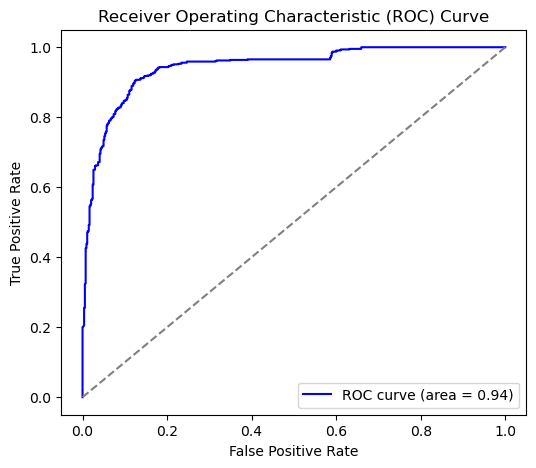

In [41]:
from sklearn.metrics import roc_curve, auc

# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(yr_test, pipeline.predict_proba(Xr_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [42]:
import joblib

# Save the trained model to a file
joblib.dump(best_model, 'churn_prediction_model.pkl')


['churn_prediction_model.pkl']

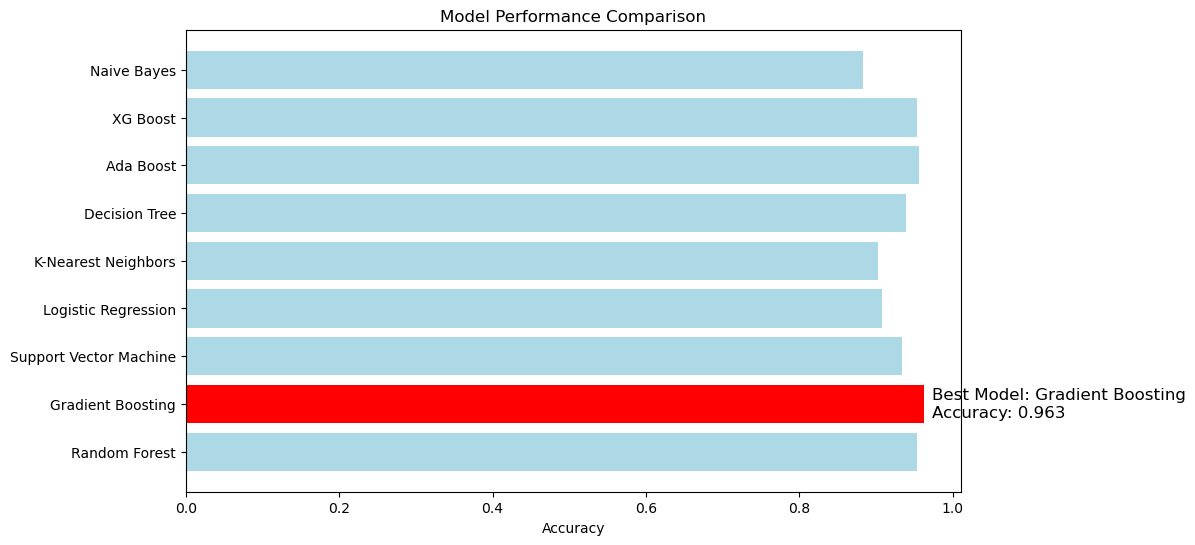

In [43]:
import matplotlib.pyplot as plt

# Convert the model scores to a DataFrame
scores_df = pd.DataFrame(model_scores)

# Find the best model's name and accuracy
best_model_name = scores_df.loc[scores_df['Accuracy'].idxmax(), 'Model']
best_model_accuracy = scores_df['Accuracy'].max()

# Plot all models and their accuracies
plt.figure(figsize=(10, 6))
plt.barh(scores_df['Model'], scores_df['Accuracy'], color='lightblue')

# Highlight the best model in red
plt.barh(best_model_name, best_model_accuracy, color='red')

# Add labels and title
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison')
plt.text(best_model_accuracy + 0.01, scores_df['Model'].tolist().index(best_model_name),
         f'Best Model: {best_model_name}\nAccuracy: {best_model_accuracy:.3f}',
         color='black', va='center', fontsize=12)

plt.show()


# **ℙ𝕚𝕖 ℂ𝕙𝕒𝕣𝕥 𝕊𝕙𝕠𝕨𝕚𝕟𝕘 𝔸𝕔𝕔𝕦𝕣𝕒𝕔𝕪 ℙ𝕣𝕠𝕡𝕠𝕣𝕥𝕚𝕠𝕟𝕤**

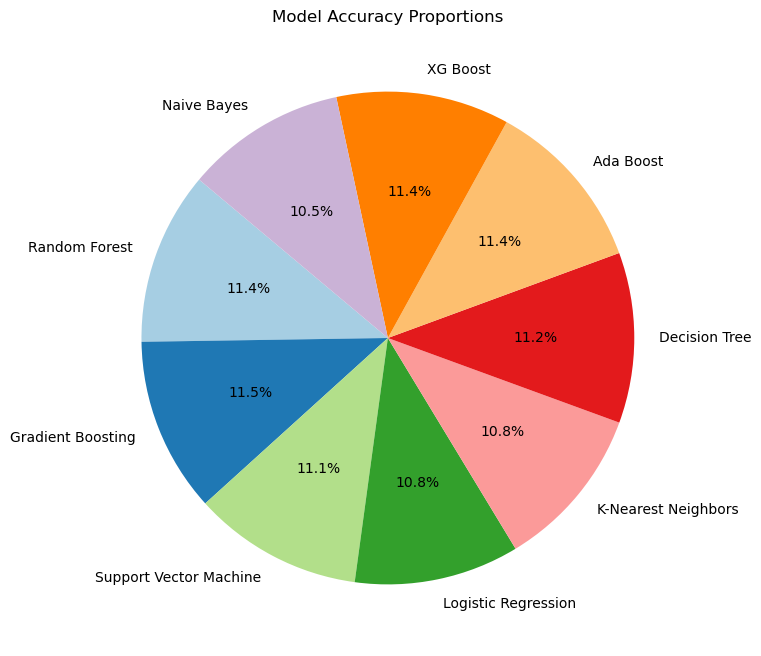

In [44]:
# Pie chart for model accuracy
accuracy_values = scores_df['Accuracy'].tolist()
model_names = scores_df['Model'].tolist()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(accuracy_values, labels=model_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Model Accuracy Proportions')
plt.show()


In [45]:
from PIL import Image, ImageDraw, ImageFont

# Create an image with a simple background
img = Image.new('RGB', (400, 200), color = (255, 255, 255))
draw = ImageDraw.Draw(img)

# Set up the font and size
font = ImageFont.load_default()

# Draw text
draw.text((20, 40), f"Best Model: {best_model_name}", fill="black", font=font)
draw.text((20, 80), f"Accuracy: {best_model_accuracy:.3f}%", fill="black", font=font)

# Save and display the image
img.save('best_model_image.png')
img.show()


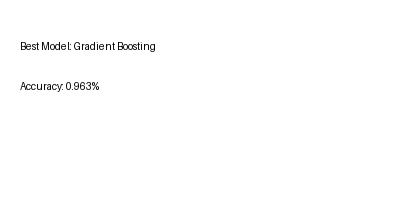

In [46]:
from IPython.display import display

# Open the saved image
img = Image.open("best_model_image.png")

# Display the image inside Jupyter Notebook
display(img)


In [47]:

print("Best Model: ", best_model.named_steps['model'].__class__.__name__)
print("Test Accuracy: ", round(best_accuracy, 3), "%")


Best Model:  GradientBoostingClassifier
Test Accuracy:  0.963 %


In [48]:
import pickle

# Assuming 'model' is your trained machine learning model
with open("churn_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [49]:
!pip install flask flask-cors joblib pandas


In [50]:
import joblib

# Assuming 'model' is your trained machine learning model
joblib.dump(model, "churn_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [51]:
!pip install --upgrade watchdog



In [53]:
import os
print(os.path.exists("churn_model.pkl"))


True


In [54]:
import os
print(os.path.abspath("churn_model.pkl"))


C:\Users\gadha\churn_model.pkl


In [55]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/gadha/OneDrive/Desktop/final project/WA_Fn-UseC_-Telco-Customer-Churn (2).csv")

# Display column names
print(df.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [56]:
print("Columns used for training:", X_train.columns.tolist())
print("Number of features:", len(X_train.columns))


Columns used for training: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automati

In [58]:
import joblib
import json

# Train your model (if not already trained)
model = GaussianNB()  # Ensure this matches your model type
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, "churn_model.pkl")

# Save feature names separately
with open("feature_names.json", "w") as f:
    json.dump(X_train.columns.tolist(), f)

print("✅ Model and feature names saved successfully!")


✅ Model and feature names saved successfully!
